# Fusion des fichiers logs et logs error

### L'objectif est d'observer le nombre d'opérations réussies et d'erreur par heure, sur la période de temps disponible (aout-novembre 24)

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import et préparation du fichier log error

In [2]:
# Ouverture du fichier
df_error = pd.read_csv('../Data/logEtl/241016_LogETLError.csv', sep=';', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

In [3]:
df_error.head()

,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,ETL_StartDateTime,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,2024-08-24 23:32:03,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34


In [4]:
# Conversion de la colonne ETL_StartDateTime en Datetime pandas
df_error['ETL_StartDateTime']=pd.to_datetime(df_error['ETL_StartDateTime'], format="%Y-%m-%d %H:%M:%S")

In [6]:
# Récupération de la date de début et de fin du fichier

start_date = df_error['ETL_StartDateTime'].min()
end_date = df_error['ETL_StartDateTime'].max()

print("Date la plus ancienne :", start_date)
print("Date la plus récente :", end_date)

Date la plus ancienne : 2024-08-24 23:32:03
Date la plus récente : 2024-10-15 23:31:49


In [7]:
# Ajout d'une colonne Date et heure ne tenant pas compte des minutes
df_error["Date et heure"] = df_error["ETL_StartDateTime"].dt.floor("h")

In [8]:
df_error.head()

,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,ETL_StartDateTime,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime,Date et heure
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,2024-08-24 23:32:03,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51,2024-08-24 23:00:00
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00


## Catégorisation des messages d'erreur

In [14]:
# Lister toutes les valeurs distinctes dans la colonne 'Message'
distinct_types = df_error['Message'].unique()
print(distinct_types)
print(len(distinct_types))

['Impossible d\'ouvrir la requête SQL sur la connexion TMS Le délai d\'attente a été dépassé  Requête SQL SELECT DISTINCT     TMS_T_FACTURE.IDFacture" AS IDFACTURE_0,     TMS_T_FACTUREDETAIL."IDFactureDetail" AS IDFACTUREDETAIL_1,     CASE WHEN NOT (TMS_T_FACTUREDETAIL."IDOrdreTaxationTiers" IS NULL) THEN TMS_T_FACTUREDETAIL."IDOrdreTaxationTiers" ELSE TMS_T_FACTUREDETAIL."IDOrdreTaxationTiersReprise" END AS CALC_2,     TMS_T_FACTUREDETAIL."IdTourneeMoyen" AS IDTOURNEEMOYEN_3,     DBO_TMS_T_TOURNEEMOYEN."IDTournee" AS IDTOURNEE_4,     TMS_T_FACTUREDETAIL."LigneFacture" AS LIGNEFACTURE_5,     TMS_T_FACTURE."NumFacture" AS NUMFACTURE_6,     TMS_T_FACTUREDETAIL."ReferenceCommande" AS REFERENCECOMMANDE_7,     TMS_T_FACTURE."DateHeureCreation" AS DATEHEURECREATION_8,     TMS_T_FACTURE."DateHeureModif" AS DATEHEUREMODIF_9,     TMS_T_FACTUREDETAIL."DateHeureModif" AS DATEHEUREMODIF_10,     TMS_T_FACTUREDETAIL."DateHeureCreation" AS DATEHEURECREATION_11,     TMS_T_FACTURE."Date (...+7337 carac

In [35]:
import pandas as pd

def categorize_message(message):
    message = message.lower()
    if "Guidez Atelier".lower() in message or "Guidez Social".lower()  in message:
        return "Guidez Atelier Error"
    elif "La taille du champ".lower()  in message:
        return "Field Size Error" 
    elif "Un incident est survenu Object reference not set to an instance of an object.".lower()  in message:
        return "Object Reference Error"
    elif "La valeur #REF!".lower()  in message:
        return "Value #REF! Error"
    elif "La valeur #VALUE!".lower()  in message:
        return "Value #VALUE! Error"
    elif "La valeur #N/A!".lower()  in message:
        return "Value #N/A! Error"
    elif "La valeur #DIV/0!".lower()  in message:
        return "Value #DIV/0! Error"
    elif "La valeur #NAME?".lower()  in message:
        return "Value #NAME? Error"
    elif "Connection Timeout Expired.  The timeout period elapsed during the post-login phase.".lower()  in message:
        return "Connection Timeout Error"
    elif "an error occurred during the pre-login handshake.".lower()  in message:
        return "Pre-Login Error"
    elif "Un incident est survenu L'instruction CREATE UNIQUE INDEX a été interrompue, car une clé dupliquée a été trouvée pour l'objet".lower()  in message:
        return "Unique Index Error"
    elif "Impossible de créer la table".lower()  in message:
        return "Create TABLE Error"
    elif "Un incident est survenu Échec de l'opération car un index ou des statistiques portant le nom".lower()  in message:
        return "Index Error (similar to unique index error)"
    elif "utilisé dans la clé primaire, sa valeur ne doit pas être vide".lower()  in message:
        return "Primary Key Error"
    elif "pas convertible en Heure".lower()  in message:
        return "Time Format Error"
    elif "Not a legal OleAut date.".lower()  in message or ("La date".lower()  in message and "est pas valide".lower()  in message):
        return "Date Format Error"
    elif "connexion au web service impossible".lower()  in message:
        return "Web Service Error"
    elif "impossible d'ouvrir la requête".lower()  in message and "Un incident est survenu".lower()  in message and "non valide".lower()  in message:
        return "SQL Invalid Query Error"
    elif "Impossible d\'ouvrir la requête SQL sur la connexion".lower()  in message and "Le délai d\'attente a été dépassé".lower()  in message:
        return "SQL Query Timeout Error"
    #elif "Le filtre de suppression n'est pas compatible SQL".lower()  in message:
    #    return "SQL Delete Filter Error"
    #elif "impossible d'ouvrir la requête sql".lower()  in message:
     #   return "SQL Other Error"
    elif "Le nom de colonne".lower()  in message and "n'existe pas dans la table ou la vue cible".lower()  in message:
        return "Column Name Error"
    else:
        return "Other Error"

df_error = df_error.assign(
    Message_Category=df_error["Message"].apply(categorize_message)
)

In [36]:
df_error.head()

,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,...,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime,Date et heure,Message_Category
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51,2024-08-24 23:00:00,SQL Query Timeout Error
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error


In [37]:
message_count = df_error['Message_Category'].value_counts()
print(message_count)
print(len(message_count))

Message_Category
Field Size Error                               197609
Date Format Error                                3859
Value #NAME? Error                                524
Web Service Error                                 113
Unique Index Error                                 94
SQL Query Timeout Error                            72
Value #REF! Error                                  21
Time Format Error                                  21
Value #DIV/0! Error                                18
Value #VALUE! Error                                15
Pre-Login Error                                    11
Connection Timeout Error                            9
Guidez Atelier Error                                9
Create TABLE Error                                  7
Other Error                                         7
Object Reference Error                              5
SQL Invalid Query Error                             3
Index Error (similar to unique index error)         2
Column Name

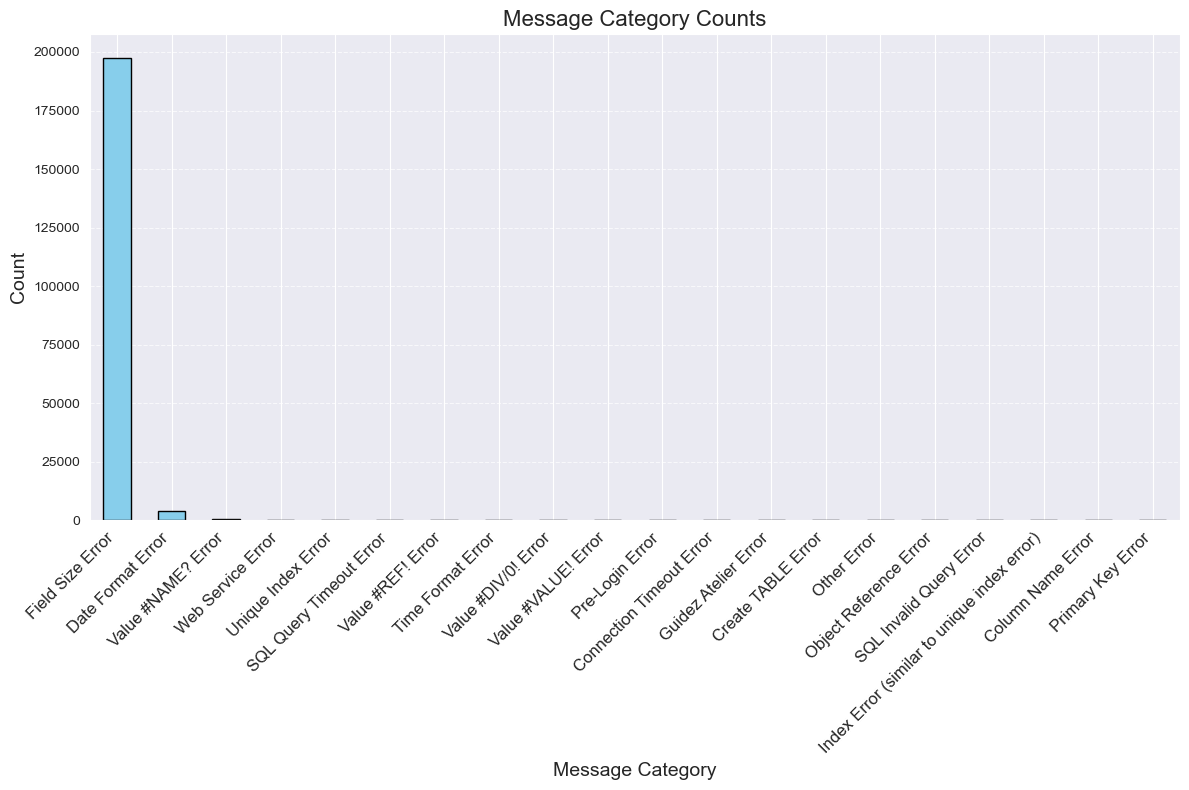

In [39]:
import matplotlib.pyplot as plt

message_count = df_error['Message_Category'].value_counts()
plt.figure(figsize=(12, 8))
message_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Message Category Counts", fontsize=16)
plt.xlabel("Message Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Détail sur les messages catégorisés dans "Other Error"

In [38]:

unique_other_errors = df_error[df_error['Message_Category'] == "Other Error"]['Message'].unique()
print(unique_other_errors)
print(len(unique_other_errors))

["Le filtre de suppression n'est pas compatible SQL"
 "Un incident est survenu Value cannot be null. (Parameter 'connection')"
 'Un incident est survenu L\'objet LAGFUELRALENTI" est introuvable, car il n\'existe pas ou vous ne disposez pas des autorisations requises."'
 'Impossible d\'ouvrir la requête SQL sur la connexion Datawarehouse Un incident est survenu Le type de données de l\'opérande datetime n\'est pas valide pour l\'opérateur avg. Requête SQL SELECT     MYREPORT_VUE_LISTE_TIERS_DONS.N__TIERS_REPER" AS N__TIERS_REPER_0,     MYREPORT_VUE_LISTE_TIERS_DONS."TIERS_REPER" AS TIERS_REPER_1,     MYREPORT_VUE_LISTE_TIERS_DONS."ADRESSE" AS ADRESSE_2,     MYREPORT_VUE_LISTE_TIERS_DONS."CP" AS CP_3,     MYREPORT_VUE_LISTE_TIERS_DONS."VILLE" AS VILLE_4,     MYREPORT_VUE_LISTE_TIERS_DONS."DEPARTEMENT" AS DEPARTEMENT_5,     SUM(MYREPORT_VUE_LISTE_TIERS_DONS."NB_DONS") AS NB_DONS_6,     AVG(MYREPORT_VUE_LISTE_TIERS_DONS."DATESAISIE") AS DATESAISIE_7,     AVG(MYREPORT_VUE_LISTE_TIERS_DONS."

A retenir : dans "other error" il y a 4 messages d'erreurs différents.On les néglige pour l'instant

## Opération de Groupby 

In [120]:
df_error.head()

,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,...,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime,Date et heure,Message_Category
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51,2024-08-24 23:00:00,SQL Query Timeout Error
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,...,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34,2024-08-25 12:00:00,Web Service Error


In [121]:
# choix des colonnes en vérifiant qu'il n'y ait pas de valeurs NaN (trop de problème dans la jointure après)
nan_count = df_error.isna().sum()
print(nan_count)

Server version                  0
Client version                  0
Product                         0
Project name                    0
Model                           0
Date                            0
Time                            0
Row number                      0
Type                            0
Message                         0
ETL_StartDateTime               0
Launcher_Id                   439
Launcher_Name                   0
Machine                         0
Program_Id                 201962
Program_Name                    0
Schedules_Id               201962
Schedules_Name             201962
Schedules_StartDateTime         0
Date et heure                   0
Message_Category                0
dtype: int64


Je voulais utiliser Schedules_name, mais trop de valeurs NaN, donc je me rabats sur Program_Name. On va aussi aggréger sur Message_category évidement

In [122]:
# liste des Message_Category
print(df_error["Message_Category"].unique())
print(df_error["Message_Category"].unique().shape)

['SQL Query Timeout Error' 'Web Service Error' 'Object Reference Error'
 'Field Size Error' 'Value #REF! Error' 'Other Error'
 'Connection Timeout Error' 'Pre-Login Error' 'Create TABLE Error'
 'Value #NAME? Error' 'Unique Index Error' 'Guidez Atelier Error'
 'Index Error (similar to unique index error)' 'SQL Invalid Query Error'
 'Primary Key Error' 'Column Name Error' 'Time Format Error'
 'Date Format Error' 'Value #VALUE! Error' 'Value #DIV/0! Error']
(20,)


In [123]:
# liste des Program_Name
print(df_error["Program_Name"].unique())
print(df_error["Program_Name"].unique().shape)

['Tous les jours' 'Toutes les semaines, le dimanche' 'ETL_API_JWT'
 'ETL Chargement PJ' 'ETL sur ordre' 'ETL JIRA' 'ETL Heures Chauffeurs'
 'ETL GLPI' 'ETL Taxation' 'ETL BEXT' 'ETL KPI ALDI'
 'ETL Vue Heures Agrégées' 'ETL Achats']
(13,)


In [124]:
# Utiliser des crosstab (ou pivot) et joindre les DataFrames

# Comptage des catégories par Date et heure
df_cat = pd.crosstab(df_error["Date et heure"], df_error["Message_Category"])

# Comptage des programmes par Date et heure
df_prog = pd.crosstab(df_error["Date et heure"], df_error["Program_Name"])

# Joindre les deux sur l'index (qui est "Date et heure" dans les 2 crosstabs)
df_error_grouped2 = df_cat.join(df_prog, how="outer")

# Remettre "Date et heure" en colonne si besoin
df_error_grouped2 = df_error_grouped2.reset_index()

df_error_grouped2.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,ETL GLPI,ETL Heures Chauffeurs,ETL JIRA,ETL KPI ALDI,ETL Taxation,ETL Vue Heures Agrégées,ETL sur ordre,ETL_API_JWT,Tous les jours,"Toutes les semaines, le dimanche"
0,2024-08-24 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2024-08-25 12:00:00,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,110
2,2024-08-25 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,2024-08-26 06:00:00,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2024-08-26 10:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Vérifier les colonnes Error
error_columns = [col for col in df_error_grouped2.columns if "Error" in col]
print(error_columns)

['Column Name Error', 'Connection Timeout Error', 'Create TABLE Error', 'Date Format Error', 'Field Size Error', 'Guidez Atelier Error', 'Index Error (similar to unique index error)', 'Object Reference Error', 'Other Error', 'Pre-Login Error', 'Primary Key Error', 'SQL Invalid Query Error', 'SQL Query Timeout Error', 'Time Format Error', 'Unique Index Error', 'Value #DIV/0! Error', 'Value #NAME? Error', 'Value #REF! Error', 'Value #VALUE! Error', 'Web Service Error']


In [126]:
# sommer le nb d'erreurs dans les colonnes erreur pour la vérification
df_error_grouped2["Total_Errors"] = df_error_grouped2[error_columns].sum(axis=1)


In [127]:
print(df_error_grouped2.shape)
df_error_grouped2.head()

(158, 35)


,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,ETL Heures Chauffeurs,ETL JIRA,ETL KPI ALDI,ETL Taxation,ETL Vue Heures Agrégées,ETL sur ordre,ETL_API_JWT,Tous les jours,"Toutes les semaines, le dimanche",Total_Errors
0,2024-08-24 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2024-08-25 12:00:00,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,110,110
2,2024-08-25 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,3
3,2024-08-26 06:00:00,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2024-08-26 10:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Ancienne opération Groupby de Guillaume

In [134]:
# Group by la colonne Date et heure en faisant le nombre d'opérations
df_error_grouped = df_error.groupby("Date et heure").agg(
    nb_operations_error=("Message_Category", "count")
).reset_index()

In [129]:
# Pourquoi????? 
#df_error_grouped = df_error_grouped.iloc[1:] 

In [135]:
print(df_error_grouped.shape)
df_error_grouped.head()

(158, 2)


,Date et heure,nb_operations_error
0,2024-08-24 23:00:00,1
1,2024-08-25 12:00:00,110
2,2024-08-25 23:00:00,3
3,2024-08-26 06:00:00,1
4,2024-08-26 10:00:00,1


## vérification

In [136]:
result = df_error_grouped2.merge(df_error_grouped[["Date et heure", "nb_operations_error"]], on="Date et heure", how="inner")
result["Check"] = result["Total_Errors"] == result["nb_operations_error"]

In [137]:
print(result.shape)
result.head()

(158, 37)


,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,ETL KPI ALDI,ETL Taxation,ETL Vue Heures Agrégées,ETL sur ordre,ETL_API_JWT,Tous les jours,"Toutes les semaines, le dimanche",Total_Errors,nb_operations_error,Check
0,2024-08-24 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,True
1,2024-08-25 12:00:00,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,110,110,110,True
2,2024-08-25 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,3,3,True
3,2024-08-26 06:00:00,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,True
4,2024-08-26 10:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,True


In [138]:
result_false_check = result[result["Check"] == False]
print(result_false_check["Date et heure"].unique())

<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


Taille de resulat=false est de 0, c'est good

## Import et préparation du fichier log

In [197]:
# Ouverture du fichier
#df = pd.read_parquet("/Users/guillaumeramirez/OneDrive - CentraleSupelec/Smart ETL - DOR/data/parquet/LogETL_20250130.csv_sub_2501301744.parquet")
#df = pd.read_parquet('/Users/Antoine/Library/CloudStorage/OneDrive-CentraleSupelec/Smart ETL - DOR/data/parquet/LogETL_20250130.csv_sub_2501301744.parquet')
df = pd.read_parquet("../data/parquet/LogETL_20250130.csv_sub_2501301744.parquet")

In [178]:
df.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.0,6.0.0,TMS/MF_TrajetsNew,Modèle simple,Mise à jour données / Insertion données,36861,0,36642,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:08,Launcher_Name_sub_5,ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f,ETL Opti TMS 1h,ETLPROGRAMMATIONBG7G6W,ETL Opti TMS toutes les 1h Lun-Sam,14/03/2024 15:41
1,6.0.0,6.0.0,TMS/MF_FactureFournisseursSansDetails,Modèle simple,Mise à jour données / Insertion données,118,0,44,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
2,6.0.0,6.0.0,TMS/MF_FacturesSansDetails,Modèle simple,Mise à jour données / Insertion données,369,0,17,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
3,6.0.0,6.0.0,TMS/MF_SAV,Modèle simple,Mise à jour données / Insertion données,277,0,191,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
4,6.0.0,6.0.0,TMS/MF_FactureFournisseurs,Modèle simple,Mise à jour données / Insertion données,1036,0,428,None,None,...,MyReport Server BE,OK,None,14/03/2024 16:20,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01


In [179]:
# Conversion de la colonne ETL_StartDateTime en Datetime pandas
df['ETL_StartDateTime']=pd.to_datetime(df['ETL_StartDateTime'], format="%d/%m/%Y %H:%M")

In [180]:
df.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.0,6.0.0,TMS/MF_TrajetsNew,Modèle simple,Mise à jour données / Insertion données,36861,0,36642,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:08:00,Launcher_Name_sub_5,ETL_b75838e4-8850-4d9a-ba25-4d541f4b237f,ETL Opti TMS 1h,ETLPROGRAMMATIONBG7G6W,ETL Opti TMS toutes les 1h Lun-Sam,14/03/2024 15:41
1,6.0.0,6.0.0,TMS/MF_FactureFournisseursSansDetails,Modèle simple,Mise à jour données / Insertion données,118,0,44,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
2,6.0.0,6.0.0,TMS/MF_FacturesSansDetails,Modèle simple,Mise à jour données / Insertion données,369,0,17,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
3,6.0.0,6.0.0,TMS/MF_SAV,Modèle simple,Mise à jour données / Insertion données,277,0,191,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01
4,6.0.0,6.0.0,TMS/MF_FactureFournisseurs,Modèle simple,Mise à jour données / Insertion données,1036,0,428,None,None,...,MyReport Server BE,OK,None,2024-03-14 16:20:00,Launcher_Name_sub_5,ETL_9fdd54e0-2573-4307-af52-efe1c4c6a0c0,ETL Opti TMS Jour,ETLPROGRAMMATIONLFMOU5,ETL Opti TMS-Compta 13h-16h Lun-Sam,14/03/2024 16:01


In [181]:
# Réduction du df pour qu'il soit dans la bonne période
df_reduced = df[(df['ETL_StartDateTime'] >= start_date) & (df['ETL_StartDateTime'] <= end_date)]

In [182]:
df_reduced.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Product,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
122840,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies P...,Modèle Excel,Insertion données,33,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122841,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies V...,Modèle Excel,Insertion données,9,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122842,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies M...,Modèle Excel,Insertion données,15,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122843,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies P...,Modèle Excel,Insertion données,19,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16
122844,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies V...,Modèle Excel,Insertion données,11,0,0,None,None,...,MyReport Server BE,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16


In [183]:
# Ajout d'une colonne Date et heure ne tenant pas compte des minutes
#df_reduced["Date et heure"] = df_reduced["ETL_StartDateTime"].dt.floor("h")
df_reduced.loc[:, "Date et heure"] = df_reduced["ETL_StartDateTime"].dt.floor("h")

/var/folders/yz/5wf96ygj4qd10wtpj2y3ty6w0000gn/T/ipykernel_8483/3885438754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.loc[:, "Date et heure"] = df_reduced["ETL_StartDateTime"].dt.floor("h")


In [184]:
df_reduced.head()

,Server version,Client version,Model,Type,Insert mode,Rows added,Rows updated,Rows deleted,Rows in error,Rows in warning,...,Result,,ETL_StartDateTime,Launcher_Name,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime,Date et heure
122840,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies P...,Modèle Excel,Insertion données,33,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122841,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies V...,Modèle Excel,Insertion données,9,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122842,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies M...,Modèle Excel,Insertion données,15,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122843,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V1/Anomalies P...,Modèle Excel,Insertion données,19,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00
122844,6.0.2,6.0.2,Excel MyReport/Anomalies MyParc/V2/Anomalies V...,Modèle Excel,Insertion données,11,0,0,None,None,...,OK,None,2024-08-25 04:18:00,Launcher_Name_sub_5,ETL_2bb27eb6-46ea-4208-9a6c-3074528a9285,ETL Anomalies V1-V2 MyParc Center,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,25/08/2024 04:16,2024-08-25 04:00:00


In [185]:
df_reduced.shape

(48112, 29)

In [186]:
df_grouped = df_reduced.groupby("Date et heure").agg(
    nb_operations=("Insert mode", "count"),  # Nombre total de lignes dans l'heure
    rows_added=("Rows added", "sum"),      # Somme des lignes ajoutées
    rows_updated=("Rows updated", "sum"),  # Somme des mises à jour
    rows_deleted=("Rows deleted", "sum")   # Somme des suppressions
).reset_index()

In [187]:
df_grouped.head()

,Date et heure,nb_operations,rows_added,rows_updated,rows_deleted
0,2024-08-25 04:00:00,11,200563,0,0
1,2024-08-25 10:00:00,30,8333604,0,0
2,2024-08-25 12:00:00,16,6207430,0,0
3,2024-08-25 22:00:00,16,192159,0,0
4,2024-08-25 23:00:00,408,474322006,0,18598


In [188]:
df_grouped.shape

(769, 5)

## Fusion des deux fichiers

In [189]:
# Fusion des deux fichiers
df_final = df_error_grouped2.merge(
    df_grouped,
    on="Date et heure",
    how="outer",
)

# Changement des valeurs NaN en 0
df_final = df_final.fillna(0)

In [190]:
df_final.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,ETL Vue Heures Agrégées,ETL sur ordre,ETL_API_JWT,Tous les jours,"Toutes les semaines, le dimanche",Total_Errors,nb_operations,rows_added,rows_updated,rows_deleted
0,2024-08-24 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2024-08-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,200563.0,0.0,0.0
2,2024-08-25 10:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,8333604.0,0.0,0.0
3,2024-08-25 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,110.0,110.0,16.0,6207430.0,0.0,0.0
4,2024-08-25 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,192159.0,0.0,0.0


In [191]:
df_final.shape

(770, 39)

# Optionel pour visualisation

In [192]:
df_filtered = df_final[df_final["Date et heure"].dt.date == pd.to_datetime("2024-10-03").date()]

df_filtered.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,ETL Vue Heures Agrégées,ETL sur ordre,ETL_API_JWT,Tous les jours,"Toutes les semaines, le dimanche",Total_Errors,nb_operations,rows_added,rows_updated,rows_deleted
570,2024-10-03 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38.0,82180739.0,0.0,0.0
571,2024-10-03 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
572,2024-10-03 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,26.0,8148258.0,0.0,0.0
573,2024-10-03 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,53.0,17156611.0,0.0,0.0
574,2024-10-03 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,25.0,8147280.0,0.0,0.0


In [193]:
# pour améliorer la visualisation, on va filtrer et retirer deux points aberrants

df_max_errors = df_final[df_final["Total_Errors"] == df_final["Total_Errors"].max()]
#df_max_errors.head()

df_filtered = df_final[~(df_final['Date et heure'] == '2024-08-29 11:00:00')]

df_max_errors = df_filtered[df_filtered["Total_Errors"] == df_filtered["Total_Errors"].max()]
df_max_errors.head()

df_filtered = df_filtered[~(df_filtered['Date et heure'] == '2024-10-03 17:00:00')]

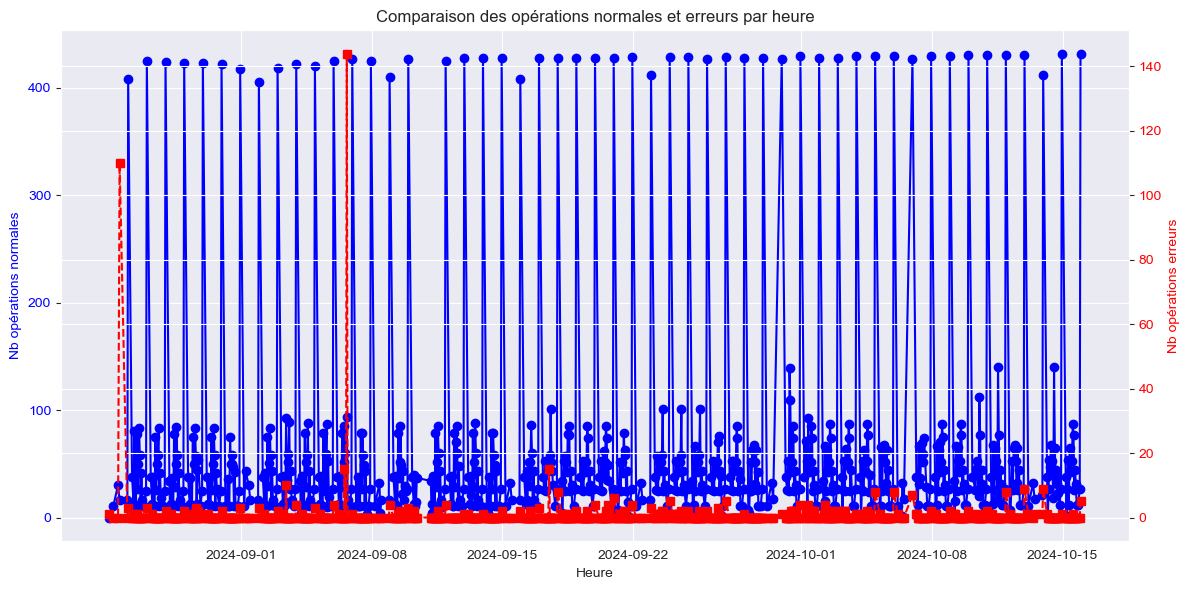

In [194]:
# Visualisation

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe principal (opérations normales)
ax1.plot(df_filtered["Date et heure"], df_filtered["nb_operations"], marker="o", linestyle="-", label="Nb opérations normales", color="blue")
ax1.set_xlabel("Heure")
ax1.set_ylabel("Nb opérations normales", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Création d'un second axe Y pour les erreurs
ax2 = ax1.twinx()
ax2.plot(df_filtered["Date et heure"], df_filtered["Total_Errors"], marker="s", linestyle="--", label="Nb opérations erreurs", color="red")
ax2.set_ylabel("Nb opérations erreurs", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Titre et légende
plt.title("Comparaison des opérations normales et erreurs par heure")
fig.tight_layout()

# Rotation des dates pour meilleure lisibilité
plt.xticks(rotation=45)

# Affichage du graphique
plt.show()


## Analyse des ETL les plus présents dans les 2 logs

In [195]:
top_program = df_error['Program_Name'].value_counts()
top_program = top_program.head()
top_program.head()

Program_Name
ETL sur ordre                       201962
Tous les jours                         166
Toutes les semaines, le dimanche       111
ETL GLPI                                53
ETL Heures Chauffeurs                   29
Name: count, dtype: int64

In [196]:
top_program = df['Program_Name'].value_counts()
top_program = top_program.head()
top_program.head()

Program_Name
Tous les jours           123924
ETL BEXT                  64857
ETL Chargement PJ         37810
ETL GLPI                  21405
ETL Heures Chauffeurs      8405
Name: count, dtype: int64

# Fusion des DF de stat server

In [198]:
df_reseau = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreprot_reseau_filtered.csv')
df_sql_statistic = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_statistic_filtered.csv')
df_sql_lock = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_lock_filtered.csv')
df_sql_general = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_general_filtered.csv')
df_ping = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_ping_filtered.csv')
df_storage = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_espace_disque_filtered.csv')
df_swap = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_swap_filtered.csv')
df_sql_management_storage = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_sql_gestionairedememoire_filtered.csv')
df_ram = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_ram_filtered.csv')
df_cpu = pd.read_csv('~/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logServer/filtered/myreport_cpu_filtered.csv')

In [199]:
df_cpu.head()

,Date et heure,Somme(%),Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,24.1667,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,17.2500,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,21.7500,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,0.0833,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.2500,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [200]:
dfs = [df_reseau, df_sql_statistic, df_sql_lock, df_sql_general, df_ping, df_storage, df_swap, df_sql_management_storage, df_ram, df_cpu]

In [201]:
df_sql_general.head()

,Date et heure,Connexions utilisateur(nb),Connexions/s(nb),Déconnexions/s(nb)
0,2024-08-25 00:00:00,8.0000,0.3020,0.3022
1,2024-08-25 01:00:00,7.1667,0.2928,0.2925
2,2024-08-25 02:00:00,6.3333,0.0742,0.0753
3,2024-08-25 03:00:00,4.0000,0.0047,0.0047
4,2024-08-25 04:00:00,4.1667,0.0686,0.0686


In [202]:
from functools import reduce

df_server_stats = reduce(lambda left, right: pd.merge(left, right, on="Date et heure", how="outer"), dfs)

In [203]:
df_server_stats.head()

,Date et heure,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),Trafic sortant (Volume)(o),Trafic sortant (Débit)(o/s),Paquets (Volume)(o),Paquets (Débit)(o/s),Paquets reçus (Volume)(o),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,1.004230e+10,2.789566e+06,4.654094e+07,12928.2196,4.020410e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,1.046046e+10,2.905723e+06,3.232100e+07,8978.1790,2.744642e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,1.114133e+10,3.094875e+06,2.092523e+07,5812.6762,1.760616e+07,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,1.979984e+06,5.500031e+02,1.578084e+04,4.3836,1.010787e+04,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,3.699959e+07,1.027781e+04,6.686273e+04,18.5732,4.979462e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [204]:
df_server_stats.columns

Index(['Date et heure', 'Somme (Volume)(Mo)', 'Somme (Débit)(Mbit/s)',
       'Trafic entrant (Volume)(o)', 'Trafic entrant (Débit)(o/s)',
       'Trafic sortant (Volume)(o)', 'Trafic sortant (Débit)(o/s)',
       'Paquets (Volume)(o)', 'Paquets (Débit)(o/s)',
       'Paquets reçus (Volume)(o)', 'Paquets reçus (Débit)(o/s)',
       'Paquets envoyés (Volume)(o)', 'Paquets envoyés (Débit)(o/s)',
       'Monodiffusion entrante (Volume)(o)',
       'Monodiffusion entrante (Débit)(o/s)',
       'Monodiffusion sortante (Volume)(o)',
       'Monodiffusion sortante (Débit)(o/s)',
       'Paquets non monodiffusion entrants (Volume)(o)',
       'Paquets non monodiffusion entrants (Débit)(o/s)',
       'Paquets non monodiffusion sortants (Volume)(o)',
       'Paquets non monodiffusion sortants (Débit)(o/s)',
       'Entrants rejetés (Volume)(o)', 'Entrants rejetés (Débit)(o/s)',
       'Couverture reseau(%)', 'Nombre de requêtes de lots/s (sql stat)(#)',
       'Compilations SQL/s (sql stat)(#)',

In [205]:
df_server_stats_sansna = df_server_stats.dropna()

print(df_server_stats.shape)
print(df_server_stats_sansna.shape)

(1248, 59)
(1248, 59)


In [206]:
df_server_stats.isna().sum().sum()

0

## Fusion du df conso logs + df conso stat server

In [207]:
print(df_final["Date et heure"].dtype)
print(df_server_stats["Date et heure"].dtype)


datetime64[ns]
object


In [208]:
df_server_stats['Date et heure'] = pd.to_datetime(df_server_stats['Date et heure'])

In [209]:
df_server_stats.head()

,Date et heure,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),Trafic sortant (Volume)(o),Trafic sortant (Débit)(o/s),Paquets (Volume)(o),Paquets (Débit)(o/s),Paquets reçus (Volume)(o),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,1.004230e+10,2.789566e+06,4.654094e+07,12928.2196,4.020410e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,1.046046e+10,2.905723e+06,3.232100e+07,8978.1790,2.744642e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,1.114133e+10,3.094875e+06,2.092523e+07,5812.6762,1.760616e+07,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,1.979984e+06,5.500031e+02,1.578084e+04,4.3836,1.010787e+04,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,3.699959e+07,1.027781e+04,6.686273e+04,18.5732,4.979462e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [210]:
print(df_final["Date et heure"].dtype)
print(df_server_stats["Date et heure"].dtype)
df_server_stats.shape

datetime64[ns]
datetime64[ns]


(1248, 59)

In [211]:
# Fusion des deux df conso
df_global = df_final.merge(
    df_server_stats,
    on="Date et heure",
    how="outer",
)

In [212]:
df_global.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-24 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
2,2024-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
3,2024-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
4,2024-08-25 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0


In [213]:
df_global.shape

(1249, 97)

In [214]:
df_global.head()

,Date et heure,Column Name Error,Connection Timeout Error,Create TABLE Error,Date Format Error,Field Size Error,Guidez Atelier Error,Index Error (similar to unique index error),Object Reference Error,Other Error,...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-24 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
2,2024-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
3,2024-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
4,2024-08-25 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0


In [215]:
df_global = df_global.fillna(0)  

In [216]:
df_global.to_csv("../data/dataset_LogETL_LogServer.csv", index=False, encoding='utf-8')